In [355]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [356]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import math
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 8

In [357]:
train_identity = pd.read_csv("train_identity.csv")
train_transaction  = pd.read_csv("train_transaction.csv")

test_identity = pd.read_csv("test_identity.csv")
test_transaction  = pd.read_csv("test_transaction.csv")

train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

del(train_identity, train_transaction, test_identity, test_transaction)

In [358]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (590540, 434)
test shape (506691, 433)


### Preprocessing

In [369]:
#add a new column and merge train and test for preprocessing step
train['isTrain'] = 1
test['isTrain'] = 0
test['isFraud'] = 10 #so we don't get null values

In [370]:
full_df = pd.concat([train, test])

C:\Users\tapan.amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [361]:
full_df

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,isFraud,isTrain
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0
506687,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0,0.0,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,10,0
506688,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0
506689,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0


In [362]:
null_values = full_df.isna().sum()
null_values = pd.DataFrame(null_values)
null_values = null_values.reset_index()
null_values.columns = ['column', 'null values']
null_values['percent null'] = (null_values['null values']/full_df.shape[0])*100
null_values = null_values.sort_values('percent null', ascending=False)

In [363]:
null_values

,column,null values,percent null
418,id_24,1087744,99.135369
419,id_25,1087060,99.073030
420,id_26,1087021,99.069476
401,id_07,1087017,99.069111
402,id_08,1087017,99.069111
...,...,...,...
41,ProductCD,0,0.000000
43,TransactionAmt,0,0.000000
44,TransactionDT,0,0.000000
45,TransactionID,0,0.000000


### Remove the columns with more than 70% of missing data

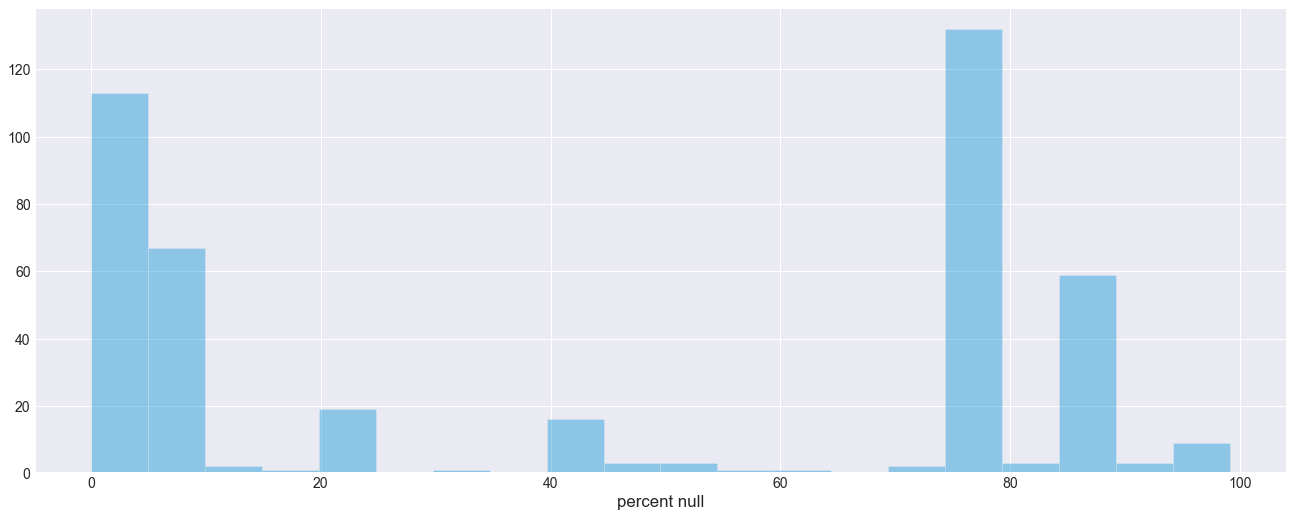

In [364]:
sns.distplot(null_values['percent null'], kde=False, bins = 20)

In [371]:
null_values = null_values[null_values['percent null'] > 80]
null_columns = null_values['column'].values

full_df = full_df.drop(columns=null_columns)

In [372]:
full_df.shape

(1097231, 361)

##### Categorical Features

In [373]:
#show categorical columns
cat_features = full_df.select_dtypes(include=['object']).columns
full_df[cat_features] = full_df[cat_features].fillna(0) #fill the null categorical values with 0

full_df = pd.get_dummies(data=full_df, columns=cat_features) #one hot encoding

In [374]:
display(full_df.head(5))
print(full_df.shape)

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_35_T,id_36_0,id_36_F,id_36_T,id_37_0,id_37_F,id_37_T,id_38_0,id_38_F,id_38_T
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,1,0,0,1


(1097231, 3504)


In [411]:
full_df = full_df.fillna(0)

train = full_df[full_df['isTrain'] == 1]
test = full_df[full_df['isTrain'] == 0]
del(test['isFraud'])

In [412]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (590540, 3504)
test shape (506691, 3503)


In [413]:
cat_features

Index(['DeviceInfo', 'DeviceType', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P_emaildomain', 'ProductCD', 'R_emaildomain', 'card4',
       'card6', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35',
       'id_36', 'id_37', 'id_38'],
      dtype='object')

### Data Visualization

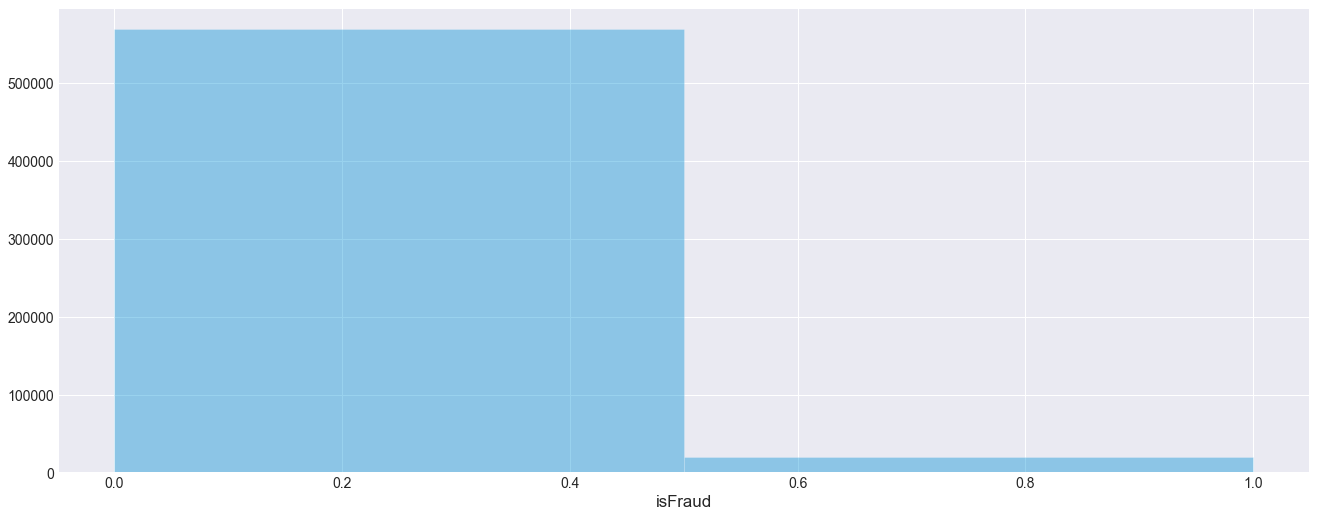

In [377]:
sns.distplot(train['isFraud'], kde=False, bins=train['isFraud'].nunique())

#### Important Features

In [274]:
# from sklearn.decomposition import PCA

In [275]:
# pca = PCA(n_components=50)
# principalComponents = pca.fit_transform(train)
# principalDf = pd.DataFrame(data = principalComponents)

In [276]:
#find important features about 20-30 of them
# for the rest of them apply PCA and reduce the dimentionality
# then again find the important features
#heat map 
# then model

In [379]:
X = train.copy()
del(X['isFraud'])
y = train.isFraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [380]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
feat_labels = X_train.columns

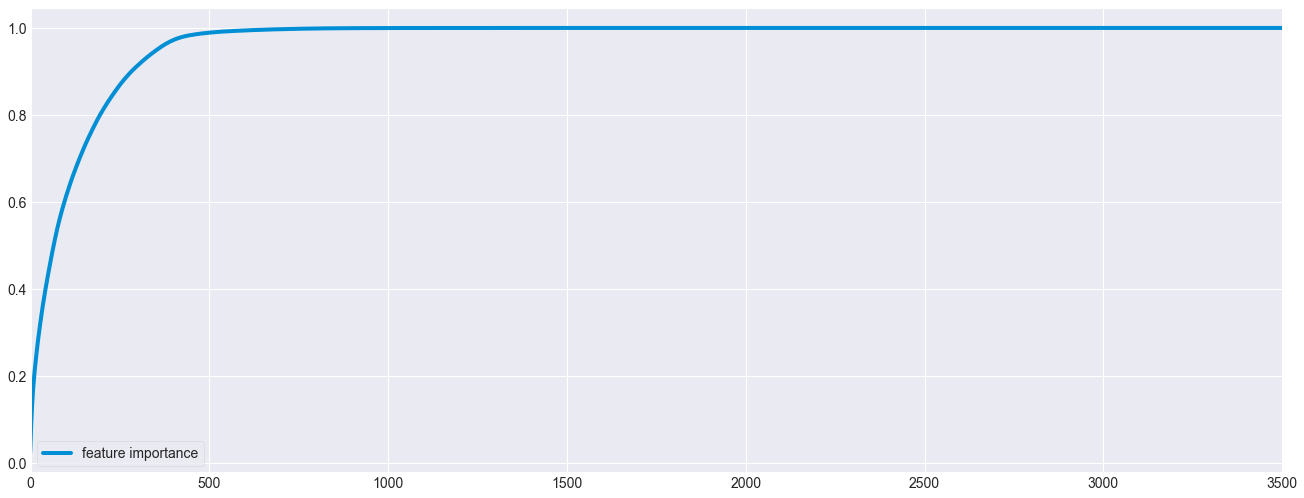

In [404]:
df = pd.DataFrame()
df['label'] = feat_labels
df['feature importance'] = clf.feature_importances_

df = df.sort_values('feature importance', ascending=False)
df['feature importance'] = round(df['feature importance'], 6)

df.sum()

df_cumsum = df.cumsum()
df_cumsum = df_cumsum.reset_index(drop=True)

df_cumsum.plot()

In [405]:
#get about 150 features which has more than 90% of the importance
#for the rest 10% apply principal component analysis to reduce dimentionality, for now ignore them

In [406]:
df_cumsum.shape

(3503, 2)

In [414]:
df = df.tail(df_cumsum.shape[0]-300) # first 300 feature has 90% importance

In [415]:
df.shape
df = pd.DataFrame(df)
#these are the not important features

In [416]:
df

,label,feature importance
69,V15,0.000757
3498,id_37_F,0.000756
271,V58,0.000754
3146,M4_0,0.000753
278,V64,0.000749
...,...,...
852,DeviceInfo_G3121 Build/48.1.A.2.21,0.000000
2143,DeviceInfo_SM-A500M,0.000000
854,DeviceInfo_G3123 Build/40.0.A.6.135,0.000000
2137,DeviceInfo_SM-A320FL Build/R16NW,0.000000


In [417]:
train = train.drop(df.label.values, axis=1)
test = test.drop(df.label.values, axis=1)

In [418]:
train.shape

(590540, 301)

In [419]:
test.shape

(506691, 300)

### Modeling

In [420]:
X = train.copy()
del(X['isFraud'])
y = train.isFraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [421]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [422]:
lr = LogisticRegression(solver='lbfgs')  
lr_model = lr.fit(X_train, y_train)

C:\Users\tapan.amin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [423]:
lr_model.score(X_test, y_test)

0.96523520845328

In [424]:
y_pred=lr_model.predict(X_test)

In [425]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,227987,26,228013
1,8186,17,8203
All,236173,43,236216


In [426]:
recall_score(y_test, y_pred)

0.0020724125320004875

In [427]:
accuracy_score(y_test, y_pred)

0.96523520845328

In [428]:
test_preds = lr_model.predict(test)

In [429]:
test

,C1,C10,C11,C12,C13,C14,C2,C4,C5,C6,...,id_15_Found,id_15_New,id_16_Found,id_16_NotFound,id_29_Found,id_31_chrome 63.0,id_31_mobile safari generic,id_37_T,id_38_F,id_38_T
0,6.0,0.0,5.0,1.0,115.0,6.0,6.0,0.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0.0,1.0,1.0,12.0,2.0,2.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.0,2.0,0.0,22.0,2.0,2.0,0.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,2.0,0.0,7.0,4.0,2.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,6.0,0.0,14.0,6.0,6.0,0.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
506687,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,1,1,0
506688,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
506689,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [430]:
submission_df = pd.DataFrame()
submission_df['TransactionID'] = test['TransactionID']
submission_df['isFraud'] = test_preds

In [431]:
submission_df

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


In [432]:
submission_df.to_csv('submission_df.csv', index=False)